In [364]:
import pandas as pd

In [365]:
questions= pd.read_csv('processed_data.csv')
questions.head()

,file,page,question,score,target
0,Question Paper - Unit 1 (WBS11) - January 2021...,2,Define the term ‘brand’ .,2,marketing mix and strategy
1,Question Paper - Unit 1 (WBS11) - January 2021...,2,Explain one risk Jack Ma may have taken when s...,4,entrepreneurs and leaders
2,Question Paper - Unit 1 (WBS11) - January 2021...,3,Analyse two factors that may have increased de...,6,the market
3,Question Paper - Unit 1 (WBS11) - January 2021...,4,Discuss if profit maximisation is the main bus...,8,entrepreneurs and leaders
4,Question Paper - Unit 1 (WBS11) - January 2021...,5,Assess the advantages of a paternalistic style...,10,managing people


In [366]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   file      270 non-null    object
 1   page      270 non-null    int64 
 2   question  270 non-null    object
 3   score     270 non-null    int64 
 4   target    270 non-null    object
dtypes: int64(2), object(3)
memory usage: 10.7+ KB


In [367]:
questions.describe()

,page,score
count,270.000000,270.000000
mean,8.570370,6.740741
std,5.154189,4.381378
min,2.000000,2.000000
25%,4.000000,4.000000
50%,8.000000,6.000000
75%,11.000000,10.000000
max,24.000000,20.000000


In [368]:
questions.describe(include='object')

,file,question,target
count,270,270,270
unique,26,267,7
top,Question paper - AS Level Paper 1 - June 2018.pdf,Define the term ‘entrepreneur’ .,meeting customer needs
freq,12,2,94


In [369]:
print(questions.shape)
#удалим вопросы из юнита2
questions = questions.drop(questions[questions.target == 'unit 2'].index)
print(questions.shape)

(270, 5)
(245, 5)


In [372]:
pip install --upgrade plotly 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 10.3 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


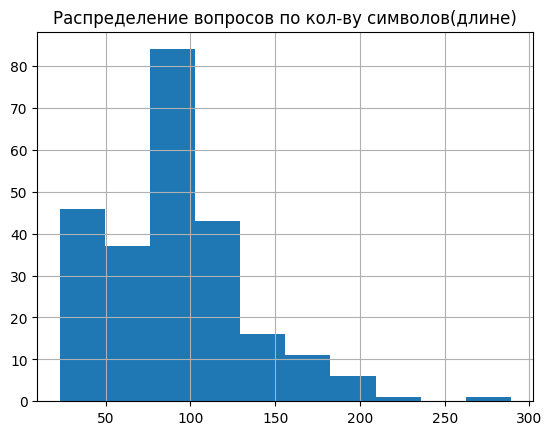

In [375]:
import matplotlib.pyplot as plt
questions['question'].str.len().hist()
plt.title('Распределение вопросов по кол-ву символов(длине)')
plt.show()

In [380]:
#добавим столбец длины вопросов в датасет
questions['len_question'] = questions['question'].apply(lambda x: len(x))
questions['len_question'].describe()

count    245.000000
mean      91.081633
std       42.226864
min       23.000000
25%       67.000000
50%       89.000000
75%      111.000000
max      289.000000
Name: len_question, dtype: float64

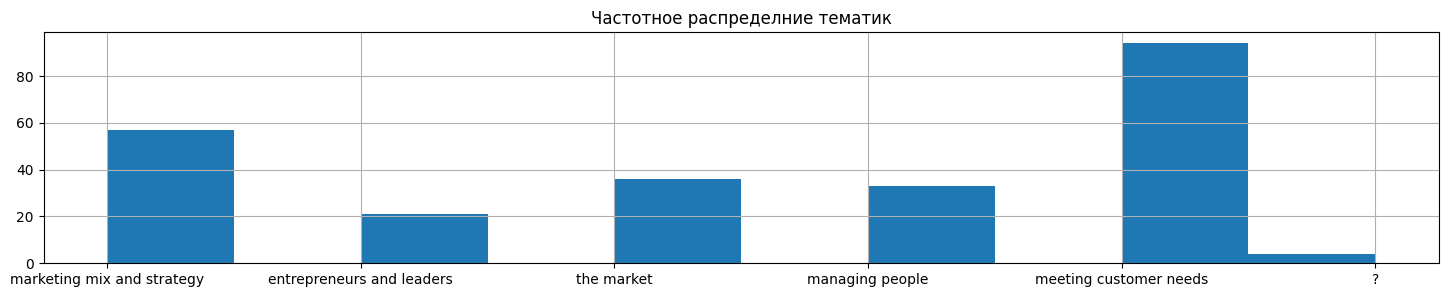

In [395]:
plt.figure( figsize=(18,3))
questions['target'].hist()
plt.title('Частотное распределние тематик')
plt.show()

In [396]:
questions.groupby('target')['target'].count().nlargest()

target
meeting customer needs        94
marketing mix and strategy    57
the market                    36
managing people               33
entrepreneurs and leaders     21
Name: target, dtype: int64

Распределение в тематиках в исходных данных неравномерное. Нужно дополнить вопросы в каждой из тематик так, чтобы тематики стали равнозначимы по кол-ву вопросов. Вариант решения - агументировать данные (синонимы слов, зашумление исходных данных и т.д.)

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

Облако слов для всех тематик

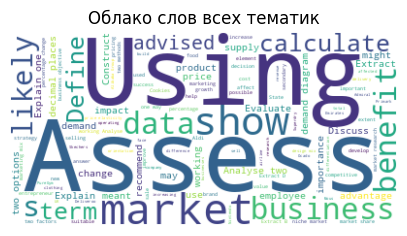

In [398]:
text = " ".join(i for i in questions.question)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Облако слов всех тематик")
plt.show()

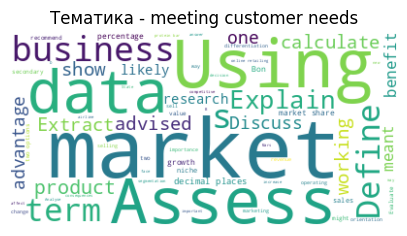

In [399]:
text = " ".join(i for i in questions[questions.target == 'meeting customer needs'].question)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Тематика - meeting customer needs")
plt.show()

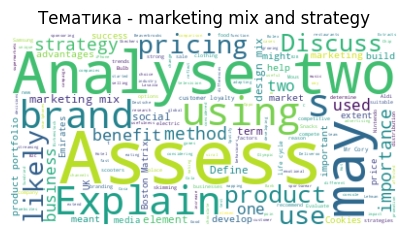

In [452]:
text = " ".join(i for i in questions[questions.target == 'marketing mix and strategy'].question)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Тематика - marketing mix and strategy")
plt.show()

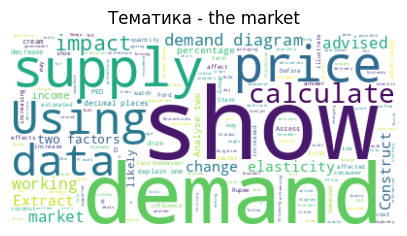

In [453]:
text = " ".join(i for i in questions[questions.target == 'the market'].question)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Тематика - the market")
plt.show()

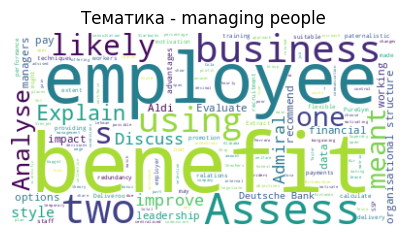

In [454]:
text = " ".join(i for i in questions[questions.target == 'managing people'].question)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Тематика - managing people")
plt.show()

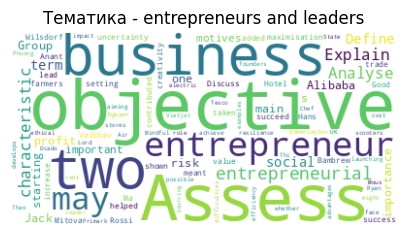

In [455]:
text = " ".join(i for i in questions[questions.target == 'entrepreneurs and leaders'].question)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Тематика - entrepreneurs and leaders")
plt.show()

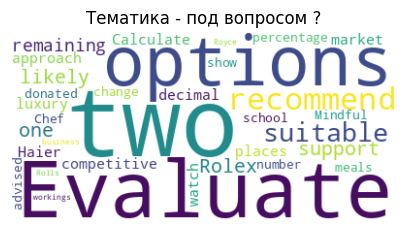

In [406]:
text = " ".join(i for i in questions[questions.target == '?'].question)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Тематика - под вопросом ?")
plt.show()

Удалим стоп-слова из данные

In [407]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/yana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


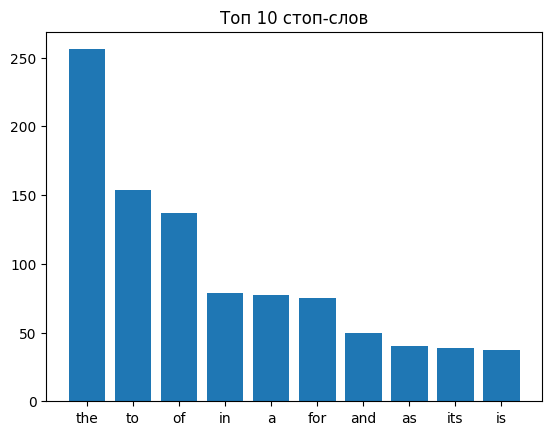

In [413]:
corpus=[]
qst= questions['question'].str.split()
qst=qst.values.tolist()
corpus=[word for i in qst for word in i]

from collections import defaultdict
dic_stop_words={}
for word in corpus:
    if str(word).lower() in stopwords:
        if word in dic_stop_words: dic_stop_words[word]+=1
        else: dic_stop_words[word]=1

top=sorted(dic_stop_words.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.title('Топ 10 стоп-слов')
plt.show()

In [414]:
questions['qst_words'] = questions.question.apply(lambda x: x.split())
questions.head()

,file,page,question,score,target,len_question,qst_words
0,Question Paper - Unit 1 (WBS11) - January 2021...,2,Define the term ‘brand’ .,2,marketing mix and strategy,25,"[Define, the, term, ‘brand’, .]"
1,Question Paper - Unit 1 (WBS11) - January 2021...,2,Explain one risk Jack Ma may have taken when s...,4,entrepreneurs and leaders,74,"[Explain, one, risk, Jack, Ma, may, have, take..."
2,Question Paper - Unit 1 (WBS11) - January 2021...,3,Analyse two factors that may have increased de...,6,the market,73,"[Analyse, two, factors, that, may, have, incre..."
3,Question Paper - Unit 1 (WBS11) - January 2021...,4,Discuss if profit maximisation is the main bus...,8,entrepreneurs and leaders,83,"[Discuss, if, profit, maximisation, is, the, m..."
4,Question Paper - Unit 1 (WBS11) - January 2021...,5,Assess the advantages of a paternalistic style...,10,managing people,102,"[Assess, the, advantages, of, a, paternalistic..."


In [415]:
words_clean_all = list()
for words in questions.qst_words:
    words_clen = list()
    for w in words:
        if w.lower() not in dic_stop_words:
            words_clen.append(w.lower())
        words_clean_str = ' '.join(words_clen)
    words_clean_all.append(words_clean_str)

questions['qst_clean'] = words_clean_all
questions['qst_clean'].describe(include='object')

count                              245
unique                             241
top       define term ‘market share’ .
freq                                 3
Name: qst_clean, dtype: object

In [416]:
questions['len_qst_cln'] = questions['qst_clean'].apply(lambda x: len(x))
questions.head()

,file,page,question,score,target,len_question,qst_words,qst_clean,len_qst_cln
0,Question Paper - Unit 1 (WBS11) - January 2021...,2,Define the term ‘brand’ .,2,marketing mix and strategy,25,"[Define, the, term, ‘brand’, .]",define term ‘brand’ .,21
1,Question Paper - Unit 1 (WBS11) - January 2021...,2,Explain one risk Jack Ma may have taken when s...,4,entrepreneurs and leaders,74,"[Explain, one, risk, Jack, Ma, may, have, take...",explain one risk jack ma may taken setting ali...,57
2,Question Paper - Unit 1 (WBS11) - January 2021...,3,Analyse two factors that may have increased de...,6,the market,73,"[Analyse, two, factors, that, may, have, incre...",analyse two factors may increased demand aliba...,55
3,Question Paper - Unit 1 (WBS11) - January 2021...,4,Discuss if profit maximisation is the main bus...,8,entrepreneurs and leaders,83,"[Discuss, if, profit, maximisation, is, the, m...",discuss profit maximisation main business obje...,66
4,Question Paper - Unit 1 (WBS11) - January 2021...,5,Assess the advantages of a paternalistic style...,10,managing people,102,"[Assess, the, advantages, of, a, paternalistic...",assess advantages paternalistic style leadersh...,72


Добавим столбец - год экзамена, в котором был вопрос

In [421]:
questions['year'] = questions['file'].apply(lambda row: int(row[-8:-4:]))
print(questions['year'].describe())
print()
print(questions['year'].unique())

count     245.000000
mean     2020.440816
std         1.811158
min      2017.000000
25%      2019.000000
50%      2021.000000
75%      2022.000000
max      2023.000000
Name: year, dtype: float64

[2021 2019 2020 2018 2022 2023 2017]


Выбросов в значениях года нет, все значения реальные

Проверим гипотезы взаимосвязи нескольких признаков. Построим их корреляции

1) Год экзамена и длину вопросов
2) Год экзамена и кол-во баллов

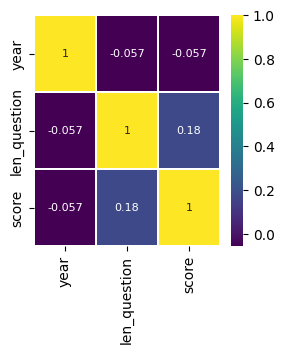

In [422]:
import seaborn as sns

qst_corr1 = pd.DataFrame({
    'year': questions['year'],
    'len_question': questions['len_qst_cln'],
    'score': questions['score']
})

fig , ax = plt.subplots(figsize = (3,3))

sns.heatmap(qst_corr1.corr(numeric_only=True),
            linewidths=0.25, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':8})

plt.show()

Корреляция между годом экзамена и длиной вопроса, годом экзамена и баллом очень маленькие: -0,057 и 0,057.
При это корреляци между длиной вопроса и баллов больше, 0,18, но тоже небольшая. При таких значениях корреляции нельзя говорить о прямой линейной зависимости факторов.

Построим все корреляции между числовыми признаками

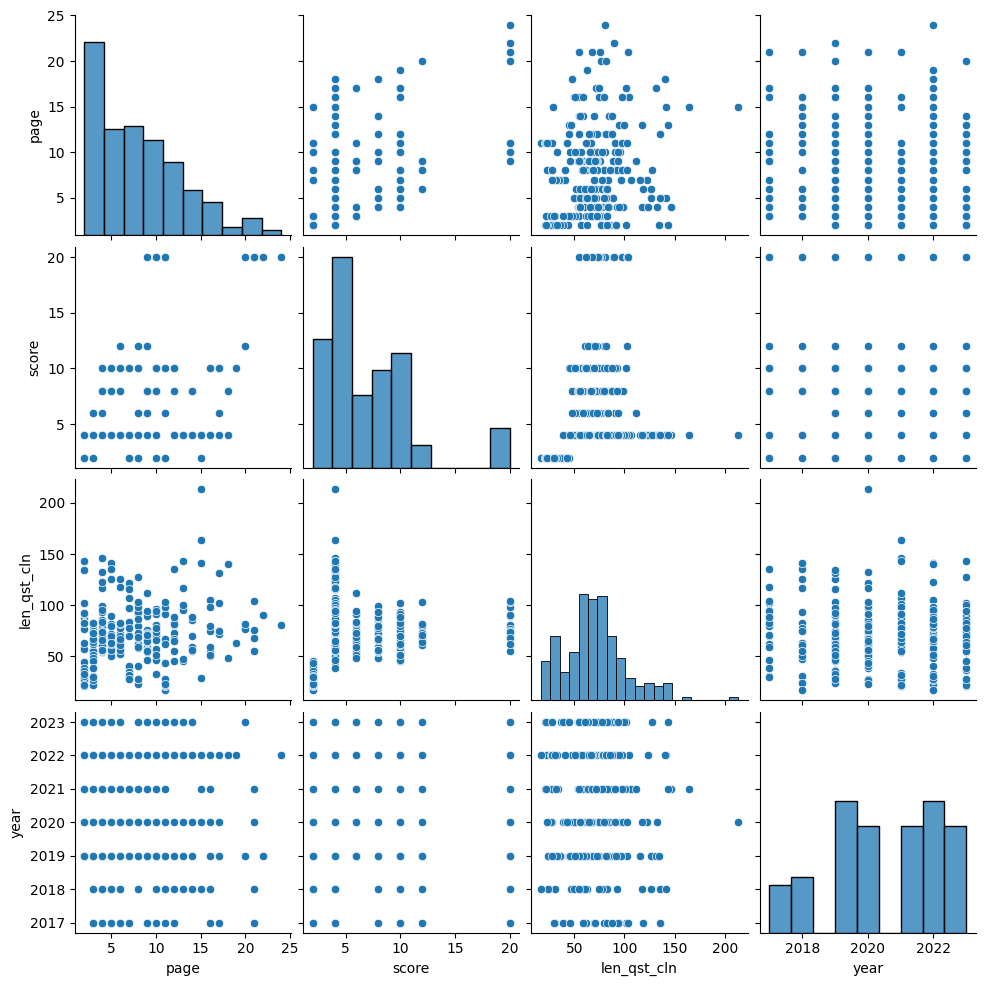

In [423]:
numeric = ['page', 'score', 'len_qst_cln', 'year']
sns.pairplot(questions[numeric]);

Баллы, страницы экзамены и длина вопросов распределены равномерно в зависимости от года, выбросов не наблюдается

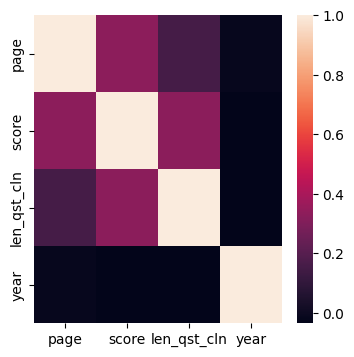

In [435]:
fig , ax = plt.subplots(figsize = (4,4))
sns.heatmap(questions[numeric].corr(method='spearman'));

Наблюдается корреляция между признакми длиной вопроса и балламми, баллами и номером страницы

Посмотрим на стат.значимость признаков

In [425]:
from scipy.stats import pearsonr, spearmanr, kendalltau
r = pearsonr(questions['len_qst_cln'], questions['score'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.17792391159199727 p-value: 0.005221729109709461


In [426]:
print(f'Корреляция Пирсона - {round(r[0],2)}, при этом p-value < 0,05, т.е. взаимосвязь длины вопроса и оценки является стат.значимой')

Корреляция Пирсона - 0.18, при этом p-value < 0,05, т.е. взаимосвязь длины вопроса и оценки является стат.значимой


In [427]:
r = pearsonr(questions['score'], questions['page'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.4275195020375357 p-value: 2.6289475602562175e-12


Корреляция Пирсона - 0,43, при этом p-value < 0,05, т.е. взаимосвязь номера страницы и оценки стат.значима

In [428]:
r = pearsonr(questions['len_qst_cln'], questions['page'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.1702757103489476 p-value: 0.0075593903912474555


Корреляция Пирсона - 0,17, при этом p-value < 0,05, т.е. взаимосвязь номера страницы и длиной вопроса стат.значима, но значение корреляции небольшое

Рассмотрим категориальные признаки - тему вопроса и начало вопроса с 'what meant'
Построим кросс-таблицу сопряженности

In [429]:
questions['flag_what_meant'] = questions['qst_clean'].apply(lambda x: 1 if 'what meant' in x else 0)
print('кол-во вопросов с what meant -', questions['flag_what_meant'].sum())
print('кол-во вопросов всего -', questions['flag_what_meant'].count())

кол-во вопросов с what meant - 19
кол-во вопросов всего - 245


In [430]:
pd.crosstab(questions['target'], questions['flag_what_meant'])

flag_what_meant,0,1
target,,
?,4,0
entrepreneurs and leaders,20,1
managing people,28,5
marketing mix and strategy,53,4
meeting customer needs,85,9
the market,36,0


В одной тематике meeting customer needs	наибольшее кол-во вопросов с конструкицей 'what meant'

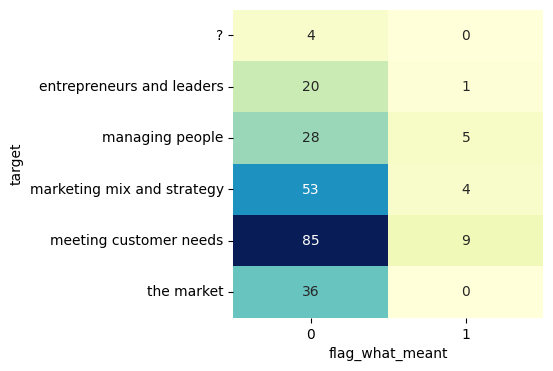

In [436]:
fig , ax = plt.subplots(figsize = (4,4))
sns.heatmap(pd.crosstab(questions['target'], questions['flag_what_meant']), 
            cmap="YlGnBu", annot=True, cbar=False);

In [437]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(questions['target'], questions['flag_what_meant']))

Chi2ContingencyResult(statistic=np.float64(6.62776227331199), pvalue=np.float64(0.2498280707980419), dof=5, expected_freq=array([[ 3.68979592,  0.31020408],
       [19.37142857,  1.62857143],
       [30.44081633,  2.55918367],
       [52.57959184,  4.42040816],
       [86.71020408,  7.28979592],
       [33.20816327,  2.79183673]]))

p-value очень большое, 0,25, значит взаимосвязь вопросов, содержащий what is и тематик, не существенна

In [456]:
chi2_contingency(pd.crosstab(questions['target'], questions['year']))

Chi2ContingencyResult(statistic=np.float64(25.849528850172234), pvalue=np.float64(0.6827893220149902), dof=30, expected_freq=array([[ 0.27755102,  0.32653061,  0.76734694,  0.62040816,  0.62040816,
         0.76734694,  0.62040816],
       [ 1.45714286,  1.71428571,  4.02857143,  3.25714286,  3.25714286,
         4.02857143,  3.25714286],
       [ 2.28979592,  2.69387755,  6.33061224,  5.11836735,  5.11836735,
         6.33061224,  5.11836735],
       [ 3.95510204,  4.65306122, 10.93469388,  8.84081633,  8.84081633,
        10.93469388,  8.84081633],
       [ 6.52244898,  7.67346939, 18.03265306, 14.57959184, 14.57959184,
        18.03265306, 14.57959184],
       [ 2.49795918,  2.93877551,  6.90612245,  5.58367347,  5.58367347,
         6.90612245,  5.58367347]]))

Построим распределение тематик в динамике по времени

In [438]:
questions.pivot_table(values='qst_clean', index='year', columns='target', aggfunc='count')

target,?,entrepreneurs and leaders,managing people,marketing mix and strategy,meeting customer needs,the market
year,,,,,,
2017,1.0,NaN,2.0,3.0,7.0,4.0
2018,1.0,1.0,4.0,2.0,11.0,1.0
2019,NaN,5.0,4.0,14.0,15.0,9.0
2020,NaN,6.0,4.0,9.0,13.0,6.0
2021,NaN,2.0,7.0,8.0,14.0,7.0
2022,1.0,4.0,9.0,9.0,18.0,6.0
2023,1.0,3.0,3.0,12.0,16.0,3.0


Самая популярная тема каждый год - meeting customer needs, на нее приходится большее кол-во вопросов каждый год

Токенезация и Лемматизация вопросов

In [439]:
from nltk.tokenize import word_tokenize

questions['qst_tokenised'] = questions['qst_clean'].apply(lambda x: word_tokenize(x))
questions.head()

,file,page,question,score,target,len_question,qst_words,qst_clean,len_qst_cln,year,flag_what_meant,qst_tokenised
0,Question Paper - Unit 1 (WBS11) - January 2021...,2,Define the term ‘brand’ .,2,marketing mix and strategy,25,"[Define, the, term, ‘brand’, .]",define term ‘brand’ .,21,2021,0,"[define, term, ‘, brand, ’, .]"
1,Question Paper - Unit 1 (WBS11) - January 2021...,2,Explain one risk Jack Ma may have taken when s...,4,entrepreneurs and leaders,74,"[Explain, one, risk, Jack, Ma, may, have, take...",explain one risk jack ma may taken setting ali...,57,2021,0,"[explain, one, risk, jack, ma, may, taken, set..."
2,Question Paper - Unit 1 (WBS11) - January 2021...,3,Analyse two factors that may have increased de...,6,the market,73,"[Analyse, two, factors, that, may, have, incre...",analyse two factors may increased demand aliba...,55,2021,0,"[analyse, two, factors, may, increased, demand..."
3,Question Paper - Unit 1 (WBS11) - January 2021...,4,Discuss if profit maximisation is the main bus...,8,entrepreneurs and leaders,83,"[Discuss, if, profit, maximisation, is, the, m...",discuss profit maximisation main business obje...,66,2021,0,"[discuss, profit, maximisation, main, business..."
4,Question Paper - Unit 1 (WBS11) - January 2021...,5,Assess the advantages of a paternalistic style...,10,managing people,102,"[Assess, the, advantages, of, a, paternalistic...",assess advantages paternalistic style leadersh...,72,2021,0,"[assess, advantages, paternalistic, style, lea..."


Удалим знаки пунктцации из вопросов

In [442]:
import string

def remove_punctuation(text):
    return [token for token in text if token not in string.punctuation and token not in ('‘', '’')]

In [443]:
questions['tokens_without_punctuationa'] = questions['qst_tokenised'].apply(remove_punctuation)

Лемматизируем вопросы

In [444]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [445]:
def lemmatize(text):
    lem = WordNetLemmatizer()
    lemmatized_text = text

    for part_of_speech in ['n', 'v', 'a', 'r', 's']:
        lemmatized_text = [lem.lemmatize(token, part_of_speech).lower() for token in lemmatized_text]
    return lemmatized_text

In [446]:
questions['tokens_lemm'] = questions['tokens_without_punctuationa'].apply(lemmatize)
questions['tokens_lst'] = questions['tokens_without_punctuationa'].apply(lambda x: ' '.join(x))
questions.head()

,file,page,question,score,target,len_question,qst_words,qst_clean,len_qst_cln,year,flag_what_meant,qst_tokenised,tokens_without_punctuationa,tokens_lemm,tokens_lst
0,Question Paper - Unit 1 (WBS11) - January 2021...,2,Define the term ‘brand’ .,2,marketing mix and strategy,25,"[Define, the, term, ‘brand’, .]",define term ‘brand’ .,21,2021,0,"[define, term, ‘, brand, ’, .]","[define, term, brand]","[define, term, brand]",define term brand
1,Question Paper - Unit 1 (WBS11) - January 2021...,2,Explain one risk Jack Ma may have taken when s...,4,entrepreneurs and leaders,74,"[Explain, one, risk, Jack, Ma, may, have, take...",explain one risk jack ma may taken setting ali...,57,2021,0,"[explain, one, risk, jack, ma, may, taken, set...","[explain, one, risk, jack, ma, may, taken, set...","[explain, one, risk, jack, ma, may, take, set,...",explain one risk jack ma may taken setting ali...
2,Question Paper - Unit 1 (WBS11) - January 2021...,3,Analyse two factors that may have increased de...,6,the market,73,"[Analyse, two, factors, that, may, have, incre...",analyse two factors may increased demand aliba...,55,2021,0,"[analyse, two, factors, may, increased, demand...","[analyse, two, factors, may, increased, demand...","[analyse, two, factor, may, increase, demand, ...",analyse two factors may increased demand aliba...
3,Question Paper - Unit 1 (WBS11) - January 2021...,4,Discuss if profit maximisation is the main bus...,8,entrepreneurs and leaders,83,"[Discuss, if, profit, maximisation, is, the, m...",discuss profit maximisation main business obje...,66,2021,0,"[discuss, profit, maximisation, main, business...","[discuss, profit, maximisation, main, business...","[discus, profit, maximisation, main, business,...",discuss profit maximisation main business obje...
4,Question Paper - Unit 1 (WBS11) - January 2021...,5,Assess the advantages of a paternalistic style...,10,managing people,102,"[Assess, the, advantages, of, a, paternalistic...",assess advantages paternalistic style leadersh...,72,2021,0,"[assess, advantages, paternalistic, style, lea...","[assess, advantages, paternalistic, style, lea...","[assess, advantage, paternalistic, style, lead...",assess advantages paternalistic style leadersh...


Выделим n-grams

In [447]:
from nltk.util import ngrams
print(list(ngrams(questions.question[0].split(),1)))
print(list(ngrams(questions.question[0].split(),2)))
print(list(ngrams(questions.question[0].split(),3)))
print(list(ngrams(questions.question[0].split(),4)))
print(list(ngrams(questions.question[0].split(),5)))

[('Define',), ('the',), ('term',), ('‘brand’',), ('.',)]
[('Define', 'the'), ('the', 'term'), ('term', '‘brand’'), ('‘brand’', '.')]
[('Define', 'the', 'term'), ('the', 'term', '‘brand’'), ('term', '‘brand’', '.')]
[('Define', 'the', 'term', '‘brand’'), ('the', 'term', '‘brand’', '.')]
[('Define', 'the', 'term', '‘brand’', '.')]


Построим самые частотные Ngrams по всему тексту, топ-50

In [449]:
collections_couter = {}

for text in questions['tokens_lst']:
    for i in range(1,6):
        ngrams_lst = list(ngrams(text.split(),i))

        for w in ngrams_lst: 
            collections_couter[w] = collections_couter.get(w, 0) + 1

top=sorted(collections_couter.items(), key=lambda x:x[1],reverse=True)[:50]
top_lst = [elem[0] for elem in top]
print(top_lst)

[('assess',), ('market',), ('two',), ('using',), ('business',), ('s',), ('explain',), ('show',), ('data',), ('demand',), ('likely',), ('one',), ('using', 'data'), ('calculate',), ('define',), ('term',), ('define', 'term'), ('analyse',), ('analyse', 'two'), ('you',), ('advised',), ('you', 'advised'), ('advised', 'show'), ('you', 'advised', 'show'), ('benefits',), ('extract',), ('discuss',), ('working',), ('may',), ('show', 'working'), ('advised', 'show', 'working'), ('you', 'advised', 'show', 'working'), ('could',), ('data', 'extract'), ('using', 'data', 'extract'), ('what',), ('meant',), ('what', 'meant'), ('explain', 'one'), ('product',), ('impact',), ('advantages',), ('decimal',), ('places',), ('decimal', 'places'), ('percentage',), ('change',), ('supply',), ('marketing',), ('evaluate',)]


In [450]:
def search_ngram(text, curr_ngram):
    elem_top = ' '.join(subelem for subelem in curr_ngram)
    
    return elem_top in text

In [451]:
import numpy as np

unique_targets = questions.target.unique()

max_corr_coeff = []
max_corr_coeff_theme = []
for n_gram in top_lst:
    has_ngram_list = []
    for question_text in questions['tokens_lst']:
        has_ngram_list.append(search_ngram(question_text, n_gram))

    max_corr = -1
    max_corr_index = -1
    for target_index in range(len(unique_targets)):
        corr_coeff = np.corrcoef(has_ngram_list, questions.target == unique_targets[target_index])
        if corr_coeff[0][1] > max_corr: 
            max_corr = corr_coeff[0][1]
            max_corr_index = target_index

    max_corr_coeff.append(max_corr)
    max_corr_coeff_theme.append(unique_targets[max_corr_index])
    
#print(max_corr_coeff)
#print(max_corr_coeff_theme)  

max_uni = max_corr_coeff[0]
max_ind = 0
for i in range(1, len(max_corr_coeff)):
    if max_corr_coeff[i] > max_uni:
        max_ind = i
        max_uni = max_corr_coeff[i]
print(f'Наиболее коррелированный n-gram {top[max_ind][0]}, с ним достигается максимальная корреляция {round(max_corr_coeff[max_ind],2)} из всех n-grams с тематикой {max_corr_coeff_theme[max_ind]}')
#print(top[max_ind])
#print(max_corr_coeff[max_ind])
#print(max_corr_coeff_theme[max_ind])
#sorted_max_corr_coeff = sorted(max_corr_coeff, reverse=True)

Наиболее коррелированный n-gram ('demand',), с ним достигается максимальная корреляция 0.9 из всех n-grams с тематикой the market


Корреляции тем с другими признаками

In [458]:
qst_year = questions['year']
qst_year

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
262    2017
263    2017
266    2017
267    2017
269    2017
Name: year, Length: 245, dtype: int64

In [467]:
qst_year = questions['year']
for target_index in range(len(unique_targets)):
        corr_coeff = np.corrcoef(qst_year, questions.target == unique_targets[target_index])
        print(f'Тематика {unique_targets[target_index]}, корреляция: {round(corr_coeff[0][1],2)}')

Тематика marketing mix and strategy, корреляция: 0.05
Тематика entrepreneurs and leaders, корреляция: 0.02
Тематика the market, корреляция: -0.07
Тематика managing people, корреляция: 0.01
Тематика meeting customer needs, корреляция: -0.01
Тематика ?, корреляция: -0.03


In [468]:
qst_score = questions['score']
for target_index in range(len(unique_targets)):
        corr_coeff = np.corrcoef(qst_score, questions.target == unique_targets[target_index])
        print(f'Тематика {unique_targets[target_index]}, корреляция: {round(corr_coeff[0][1],2)}')

Тематика marketing mix and strategy, корреляция: 0.05
Тематика entrepreneurs and leaders, корреляция: -0.03
Тематика the market, корреляция: -0.16
Тематика managing people, корреляция: 0.11
Тематика meeting customer needs, корреляция: -0.06
Тематика ?, корреляция: 0.27


In [469]:
qst_len_qst_cln = questions['len_qst_cln']
for target_index in range(len(unique_targets)):
        corr_coeff = np.corrcoef(qst_len_qst_cln, questions.target == unique_targets[target_index])
        print(f'Тематика {unique_targets[target_index]}, корреляция: {round(corr_coeff[0][1],2)}')

Тематика marketing mix and strategy, корреляция: -0.15
Тематика entrepreneurs and leaders, корреляция: -0.1
Тематика the market, корреляция: 0.31
Тематика managing people, корреляция: 0.03
Тематика meeting customer needs, корреляция: -0.07
Тематика ?, корреляция: 0.06


In [470]:
qst_page = questions['page']
for target_index in range(len(unique_targets)):
        corr_coeff = np.corrcoef(qst_page, questions.target == unique_targets[target_index])
        print(f'Тематика {unique_targets[target_index]}, корреляция: {round(corr_coeff[0][1],2)}')

Тематика marketing mix and strategy, корреляция: -0.02
Тематика entrepreneurs and leaders, корреляция: -0.13
Тематика the market, корреляция: -0.1
Тематика managing people, корреляция: 0.1
Тематика meeting customer needs, корреляция: 0.06
Тематика ?, корреляция: 0.13
